In [1]:
import numpy as np
from pandas import DataFrame, Series
from skimage import io
from sklearn.cluster import KMeans

photo = io.imread("https://upload.wikimedia.org/wikipedia/commons/thumb/9/97/Swallow-tailed_bee-eater_%28Merops_hirundineus_chrysolaimus%29.jpg/768px-Swallow-tailed_bee-eater_%28Merops_hirundineus_chrysolaimus%29.jpg")

photo = np.array(photo, dtype=np.float64) / 255  # Scale values
w, h, d = original_shape = tuple(photo.shape)  # Get the current shape
image_array = np.reshape(photo, (w * h, d))  # Reshape to to 2D

pixels = DataFrame(image_array, columns=["Red", "Green", "Blue"])

pixels_sample = pixels.sample(frac=0.05)

kmeans = KMeans(n_clusters=10).fit(pixels_sample[["Red", "Green", "Blue"]])

labels = kmeans.predict(pixels[["Red", "Green", "Blue"]])

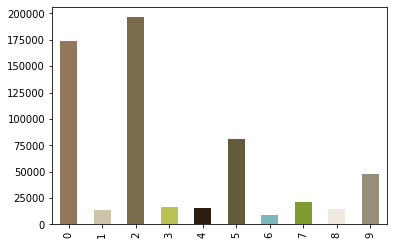

In [2]:
%matplotlib inline

Series(labels).value_counts(sort=False).plot.bar(color=kmeans.cluster_centers_)